### Required package
pandas
numpy
pyarrow
fastparquet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### tag name:

camera_box, camera_calibration, camera_hkp, camera_image, camera_segmentation, camera_to_lidar_box_association

lidar, lidar_box, lidar_calibration, lidar_camera_projection, lidar_camera_synced_box, lidar_hkp, lidar_pose, lidar_segmentation

projected_lidar_box, stats, vehicle_pose

In [4]:
# Path to the directory with all components
dataset_dir = '../../WoD/validation'

context_name = '17065833287841703_2980_000_3000_000'

def read(tag: str) -> pd:
  """Creates a Dask DataFrame for the component specified by its tag."""
  paths = f'{dataset_dir}/{tag}/{context_name}.parquet'
  return pd.read_parquet(paths)

#### lidar
[LiDARComponent].range_image_return1

[64, 2650, 4]

channel 0: range (see spherical coordinate system definition)

channel 1: lidar intensity

channel 2: lidar elongation

channel 3: is_in_nlz (1 = in, -1 = not in)

#### lidar_camera_projection
[LiDARCameraProjectionComponent].range_image_return1

[6, 2650, 6]

channel 0: camera name

channel 1: x (axis along image width)

channel 2: y (axis along image height)

channel 3: camera name of 2nd projection (set to UNKNOWN if no projection)

channel 4: x (axis along image width)

channel 5: y (axis along image height)

In [10]:
lidar_df = read('lidar')
# Let's inspect the first frame's data
lidar_df1 = lidar_df.iloc[0]
shape = lidar_df1['[LiDARComponent].range_image_return1.shape']
range_image_flat = lidar_df1['[LiDARComponent].range_image_return1.values']
range_image = np.array(range_image_flat).reshape(shape)
print(range_image.shape)  # 

(64, 2650, 4)


In [14]:
lidar_segmentation_df = read('lidar_segmentation')
lidar_segmentation_df1 = lidar_segmentation_df.iloc[0]
shape = lidar_segmentation_df1['[LiDARSegmentationLabelComponent].range_image_return1.shape']
label_flat = lidar_segmentation_df1['[LiDARSegmentationLabelComponent].range_image_return1.values']

In [19]:
label_image = np.array(label_flat).reshape(shape)
label_image1 = label_image[..., 0]
label_image2 = label_image[..., 1]

In [25]:
camera_image_df = read('camera_image')
camera_image_df1 = camera_image_df.iloc[0]
im1 = camera_image_df1['[CameraImageComponent].image']


In [27]:
# im1 is a jpeg image, need to decode it
from PIL import Image
import io
im1 = Image.open(io.BytesIO(im1))
im1 = im1.convert("RGB")
# show image


In [28]:
im1.show()

In [22]:
#  print state of label
print("Label image 1 unique values:", np.unique(label_image1))
print("Label image 2 unique values:", np.unique(label_image2))

Label image 1 unique values: [ -1   0  28  29  30  31  32  33  34  35  36  37  45  48  49  56  57  58
  60  61  62  65  66  68  75  76  77  79  80  81 258]
Label image 2 unique values: [ 0  1  8  9 10 11 13 14 15 16 17 18 19 20 21 22]


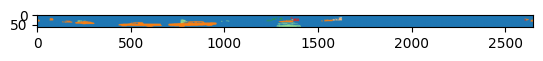

In [21]:
plt.imshow(label_image1, cmap='tab20')

In [ ]:
# lidar_camera_projection_df = read('lidar_camera_projection')
# lidar_camera_projection_df1 = lidar_camera_projection_df.iloc[0]
# shape = lidar_camera_projection_df1['[LiDARCameraProjectionComponent].range_image_return1.shape']
# range_image_flat = lidar_camera_projection_df1['[LiDARCameraProjectionComponent].range_image_return1.values']
# range_image = np.array(range_image_flat).reshape(shape)

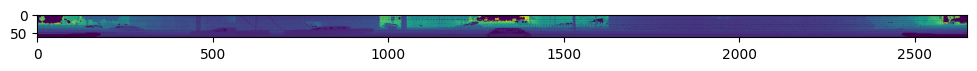

In [11]:
range_channel = range_image[..., 0]
intensity_channel = range_image[..., 1]
#  save range_channel as png like heatmap
plt.imsave('range_channel.png', range_channel, cmap='hot')
# Plot the range channel
plt.figure(figsize=(12, 4))
plt.imshow(range_channel)